In [12]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import random as r
from scipy import ndimage
from scipy.misc import toimage

%matplotlib inline

m = [[4, 1, 6, 1, 3],
     [3, 2, 7, 7, 2],
     [2, 5, 7, 3, 7],
     [1, 4, 7, 1, 3],
     [0, 1, 6, 4, 4]]
numrows = len(m)    
numcols = len(m[0])

m_2=[[0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0]]

#Copy 2D-Array
for i in range(2, numrows+2):
    for j in range(2,numcols+2):
        m_2[i][j]=m[i-2][j-2]

sol_mean=[   [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0]]

#Compute 3x3 mean filter
for i in range(2,numrows+2):
     for j in range(2,numcols+2):
        sol_mean[i][j]=np.mean([
                    m_2[i-2][j-2],m_2[i-2][j-1],m_2[i-2][j],
                    m_2[i-1][j-2],m_2[i-1][j-1],m_2[i-1][j],
                    m_2[i][j-2],m_2[i][j-1],m_2[i][j]])
    
            

# 1.1 Convolve the following sub-image with a normalized 33 mean filter. What is the output?

In [2]:
print sol_mean

[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0.44444444444444442, 0.55555555555555558, 1.2222222222222223, 0.88888888888888884, 1.1111111111111112], [0, 0, 0.77777777777777779, 1.1111111111111112, 2.5555555555555554, 2.6666666666666665, 2.8888888888888888], [0, 0, 1.0, 1.8888888888888888, 4.1111111111111107, 4.333333333333333, 4.7777777777777777], [0, 0, 0.66666666666666663, 1.8888888888888888, 4.2222222222222223, 4.7777777777777777, 4.8888888888888893], [0, 0, 0.33333333333333331, 1.4444444444444444, 3.6666666666666665, 4.2222222222222223, 4.666666666666667]]


# 1.2 Redo the convolution with a median filter. 

In [3]:
#Compute 3x3 mean filter
sol_median=[ [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0]]

for i in range(2,numrows+2):
     for j in range(2,numcols+2):
        sol_median[i][j]=np.median([
                    m_2[i-2][j-2],m_2[i-2][j-1],m_2[i-2][j],
                    m_2[i-1][j-2],m_2[i-1][j-1],m_2[i-1][j],
                    m_2[i][j-2],m_2[i][j-1],m_2[i][j]])
    
print sol_median

[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0.0, 0.0, 0.0, 0.0, 0.0], [0, 0, 0.0, 0.0, 2.0, 1.0, 2.0], [0, 0, 0.0, 2.0, 4.0, 5.0, 6.0], [0, 0, 0.0, 2.0, 4.0, 5.0, 7.0], [0, 0, 0.0, 1.0, 4.0, 4.0, 4.0]]


What is the difference from item 1?

In [4]:
sol_diff=  [ [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0]]

for i in range(0,len(sol_diff)):
    for j in range(0,len(sol_diff[0])):
        sol_diff[i][j] = sol_mean[i][j]-sol_median[i][j]

# 1.3 For the same sub-image, find the gradient magnitude and gradient direction at the center entry using the Sobel operator.

In [5]:
sobel_x =np.matrix([
             [-1,0,1],
             [-2,0,2],
             [-1,0,1]])

sobel_y =np.matrix([
             [1,2,1],
             [0,0,0],
             [-1,-2,-1]])
m_middle = np.matrix([[2,7,7],
                    [5,7,3],
                    [4,7,1]])
def convolve(m,g):
    return m[2].item(2)*g[0].item(0)+m[2].item(1)*g[0].item(1)+m[2].item(0)*g[0].item(2)+m[1].item(2)*g[1].item(0)+m[1].item(1)*g[1].item(1)+m[1].item(0)*g[1].item(2)+m[0].item(2)*g[2].item(0)+m[0].item(1)*g[2].item(1)+m[0].item(0)*g[2].item(2)

def grad_magnitude(m):
    g_x = convolve(m_middle,sobel_x)
    g_y = convolve(m_middle,sobel_y)
    return math.sqrt(math.pow(g_x,2)+math.pow(g_y,2))

def grad_direction(m):
    g_x = convolve(m_middle,sobel_x)
    g_y = convolve(m_middle,sobel_y)
    return math.atan(g_y/g_x)

# Gradient Magnitude


In [6]:
grad_magnitude(m_middle)

4.47213595499958

# Gradient Direction

In [7]:
grad_direction(m_middle)

-1.1071487177940906

#1.4 -- Unsure how to solve.

1.4.1 -- ? 
1.4.2 -- ?
1.4.3 -- I think this is Gaussian filter. 



In [18]:
#Read images
from skimage.io import imread
im_cameraman = imread("HW1/Images/Q1/cameraman.jpg")
im_house = imread("HW1/Images/Q1/house.jpg")
im_lena = imread("HW1/Images/Q1/lena.jpg")

#Convert to greyscale by using average of RGB
def average(pixel):
    return (int(pixel[0])+int(pixel[1])+int(pixel[2]))/3

def rgb2gray(image):
    gray = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
            gray[rownum][colnum] = average(image[rownum][colnum])

    return gray

im_cameraman_gray = rgb2gray(im_cameraman)
im_house_gray = rgb2gray(im_house)
im_lena_gray = rgb2gray(im_lena)

In [76]:
# 1.4.1 -- Distance between pixels



# 1.4.2 -- Distance between pixel values = Mean filter





# 1.4.3 -- Gaussian Filter
gaussian_kernel = np.matrix([
                             [0.0625,0.125,0.0625],
                             [0.125,.25,0.125],
                             [0.0625,0.125,0.0625]])

def add_noise(image):
    for rownum in range(len(image)):
        for colnum in range(len(image[0])):

            image[rownum][colnum] = image[rownum][colnum]+(0.5-r.random())*10
    return image


def apply_filter(image,kernel):
    sol_image = convolve_image(image,kernel)        #convolve with kernel.
    sol_image = add_noise(sol_image)                #Add noise to image
    sol_image = convolve_image(sol_image,kernel)    #convolve with kernel
    
    return sol_image

#iterate and apply filter.       
def convolve_image(image,kernel):
    
    #1 - Given image, we copy the matrix into temp_image and add 0's to the borders. 
    #2 - We convolve every 3x3 section by the kernel. 
    #3 - we return the sol_image. 
    
    #1 -- 
    temp_image = np.zeros((image.shape[0]+2, image.shape[1]+2)) # init 2D numpy array
    
    #copy image into expanded image. This is inefficient but makes it simple to handle all border cases.
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
             temp_image[rownum+1][colnum+1] = image[rownum][colnum]

    sol_image = np.zeros((image.shape[0]+2, image.shape[1]+2)) # init 2D numpy array, that will hold solution image.
    
    #2 --
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
            temp_3by3 = np.matrix([
                                  [temp_image[rownum][colnum],temp_image[rownum][colnum+1],temp_image[rownum][colnum+2]],
                                  [temp_image[rownum+1][colnum],temp_image[rownum+1][colnum+1],temp_image[rownum+1][colnum+2]],
                                  [temp_image[rownum+2][colnum],temp_image[rownum+2][colnum+1],temp_image[rownum+2][colnum+2]]])
            
            sol_image[rownum+1][colnum+1] = convolve(temp_3by3,kernel)
    #3 --
    return sol_image


In [77]:
im = apply_filter(im_cameraman_gray,gaussian_kernel)


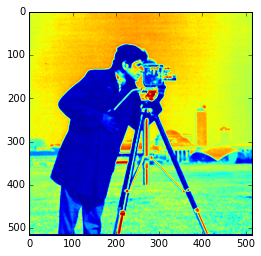

In [82]:
plt.imshow(im)

In [83]:
#1.5 -- implement the following Unsharp Masking:

def unsharp_masking(image,sigma):
    #apply gaussian filter to image with sigma
    gauss_applied = scipy.ndimage.filters.gaussian_filter(image,sigma)
    
    #Unsharp Masking scheme based on formula from the question.
    return 2*image - gauss_applied
    

In [9]:
#sigma = 0.75
im_cameraman_applied = unsharp_masking(im_cameraman_gray,0.75)
im_house_applied = unsharp_masking(im_house_gray,0.75)
im_lena_applied = unsharp_masking(im_lena_gray,0.75)


#sigma = 2.5 
im_cameraman_applied2 = unsharp_masking(im_cameraman_gray,2.5)
im_house_applied2 = unsharp_masking(im_house_gray,2.5)
im_lena_applied2 = unsharp_masking(im_lena_gray,2.5)



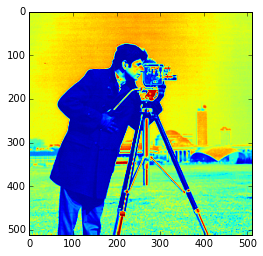

In [10]:
#Compare filters + results
toimage(im_cameraman_gray).show()
toimage(im_cameraman_applied).show()
toimage(im_cameraman_applied2).show()

#image house
toimage(im_house_gray).show()
toimage(im_house_applied).show()
toimage(im_house_applied2).show()

#image lena
toimage(im_lena_gray).show()
toimage(im_lena_applied).show()
toimage(im_lena_applied2).show()


Cameraman -
1. The original grayscale image is the sharpest. 
2. The image with sigma = 2.5 is "dull" in the sense  that the image seems to be more gray and use a smaller range of values. 
3. The image with sigma = 0.75 is not as sharp as the original but also still clearer than the image with sigma = 2.5

House
1. The original grayscale image is the least sharp of the images.
2. The image with sigma = 2.5 is the sharpest. Specifically, the contrast between the bricks and the house gutter is more sharp.
3. image with simage = 0.75 is sharper than the original but not as sharp as sigma=2.5


Lena
1. Like the cameraman, the original is the sharpest. Though, the image with sigma= 0.75 is almost as sharp.
2. The image with Sigma = 2.5 is not as sharp.

